In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import math
import missingno as msno

In [ ]:
pima = pd.read_csv("PimaDiabetes_1.csv")

# **2. Exploratory Data Analysis**

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.isna().sum() #checking null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigree,0
Age,0
Outcome,0


In [ ]:
pimaNum = pima.drop('Outcome', axis=1)

In [ ]:
pimaNum.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
pima['Outcome'].value_counts()

,count
Outcome,
0,490
1,260


## **Univariate**

In [ ]:
#function to create histogram, kde, & ecdf for each feature
def univariateEDA(df):
  feature_names = df.columns
  nVar = len(feature_names)
  fig, axs = plt.subplots(nVar,3, figsize=(20,25))
  for ind, col in enumerate(feature_names):
    for i in range(3):
      if i == 0:
        sns.histplot(df[col], kde=True, edgecolor='white', ax=axs[ind,i])
      elif i == 1:
        kdeAxes = sns.kdeplot(df[col], ax=axs[ind,i])
        kdeX, kdeY = kdeAxes.lines[0].get_data()
        kdeXmax = kdeX[np.argwhere(kdeY == kdeY.max())]
        kdeAxes.plot(df[col].mean()*np.ones(2), np.array([0, kdeY.max()]), '--b', label='Mean')
        kdeAxes.plot(df[col].median()*np.ones(2), np.array([0, kdeY.max()]), '-.r', label = 'Median')
        kdeAxes.plot(kdeX[np.argwhere(kdeY == kdeY.max())].flatten()*np.ones(2), np.array([0, kdeY.max()]), ':m', label='KDE-estimated Mode')
        kdeAxes.legend(fontsize='large')
      else:
        p25 = np.percentile(df[col].dropna(),25)
        p50 = np.percentile(df[col].dropna(),50)
        p75 = np.percentile(df[col].dropna(),75)
        p95 = np.percentile(df[col].dropna(),95)
        p99 = np.percentile(df[col].dropna(),99)

        ecdf = ECDF(df[col].dropna())
        ecdf.x.max()

        axs[ind,i].step(ecdf.x, 100*ecdf.y)
        axs[ind,i].plot([0,p25,p25],[25,25,0], '--k')
        axs[ind,i].plot([0,p50,p50],[50,50,0], '--k')
        axs[ind,i].plot([0,p75,p75],[75,75,0], '--k')
        axs[ind,i].plot([0,p95,p95],[95,95,0], '--k')
        axs[ind,i].plot([0,p99,p99],[99,99,0], '--k')
        axs[ind,i].set_xlabel(col)
        axs[ind,i].set_ylabel('ECDF x 100%')
        axs[ind,i].set_xlim(0, ecdf.x.max())
        axs[ind,i].set_ylim(0, 105)
        axs[ind,i].set_xticks((0,p25,p50,p95,p99, ecdf.x.max()), (0, '$P_{25}$','$P_{50}$','$P_{95}$','$P_{99}$',ecdf.x.max()), fontsize=7)


  axs[0,0].set_title('Histogram', weight='bold')
  axs[0,1].set_title('KDE',weight='bold')
  axs[0,2].set_title('ECDF', weight='bold')

  plt.tight_layout()


  plt.show()


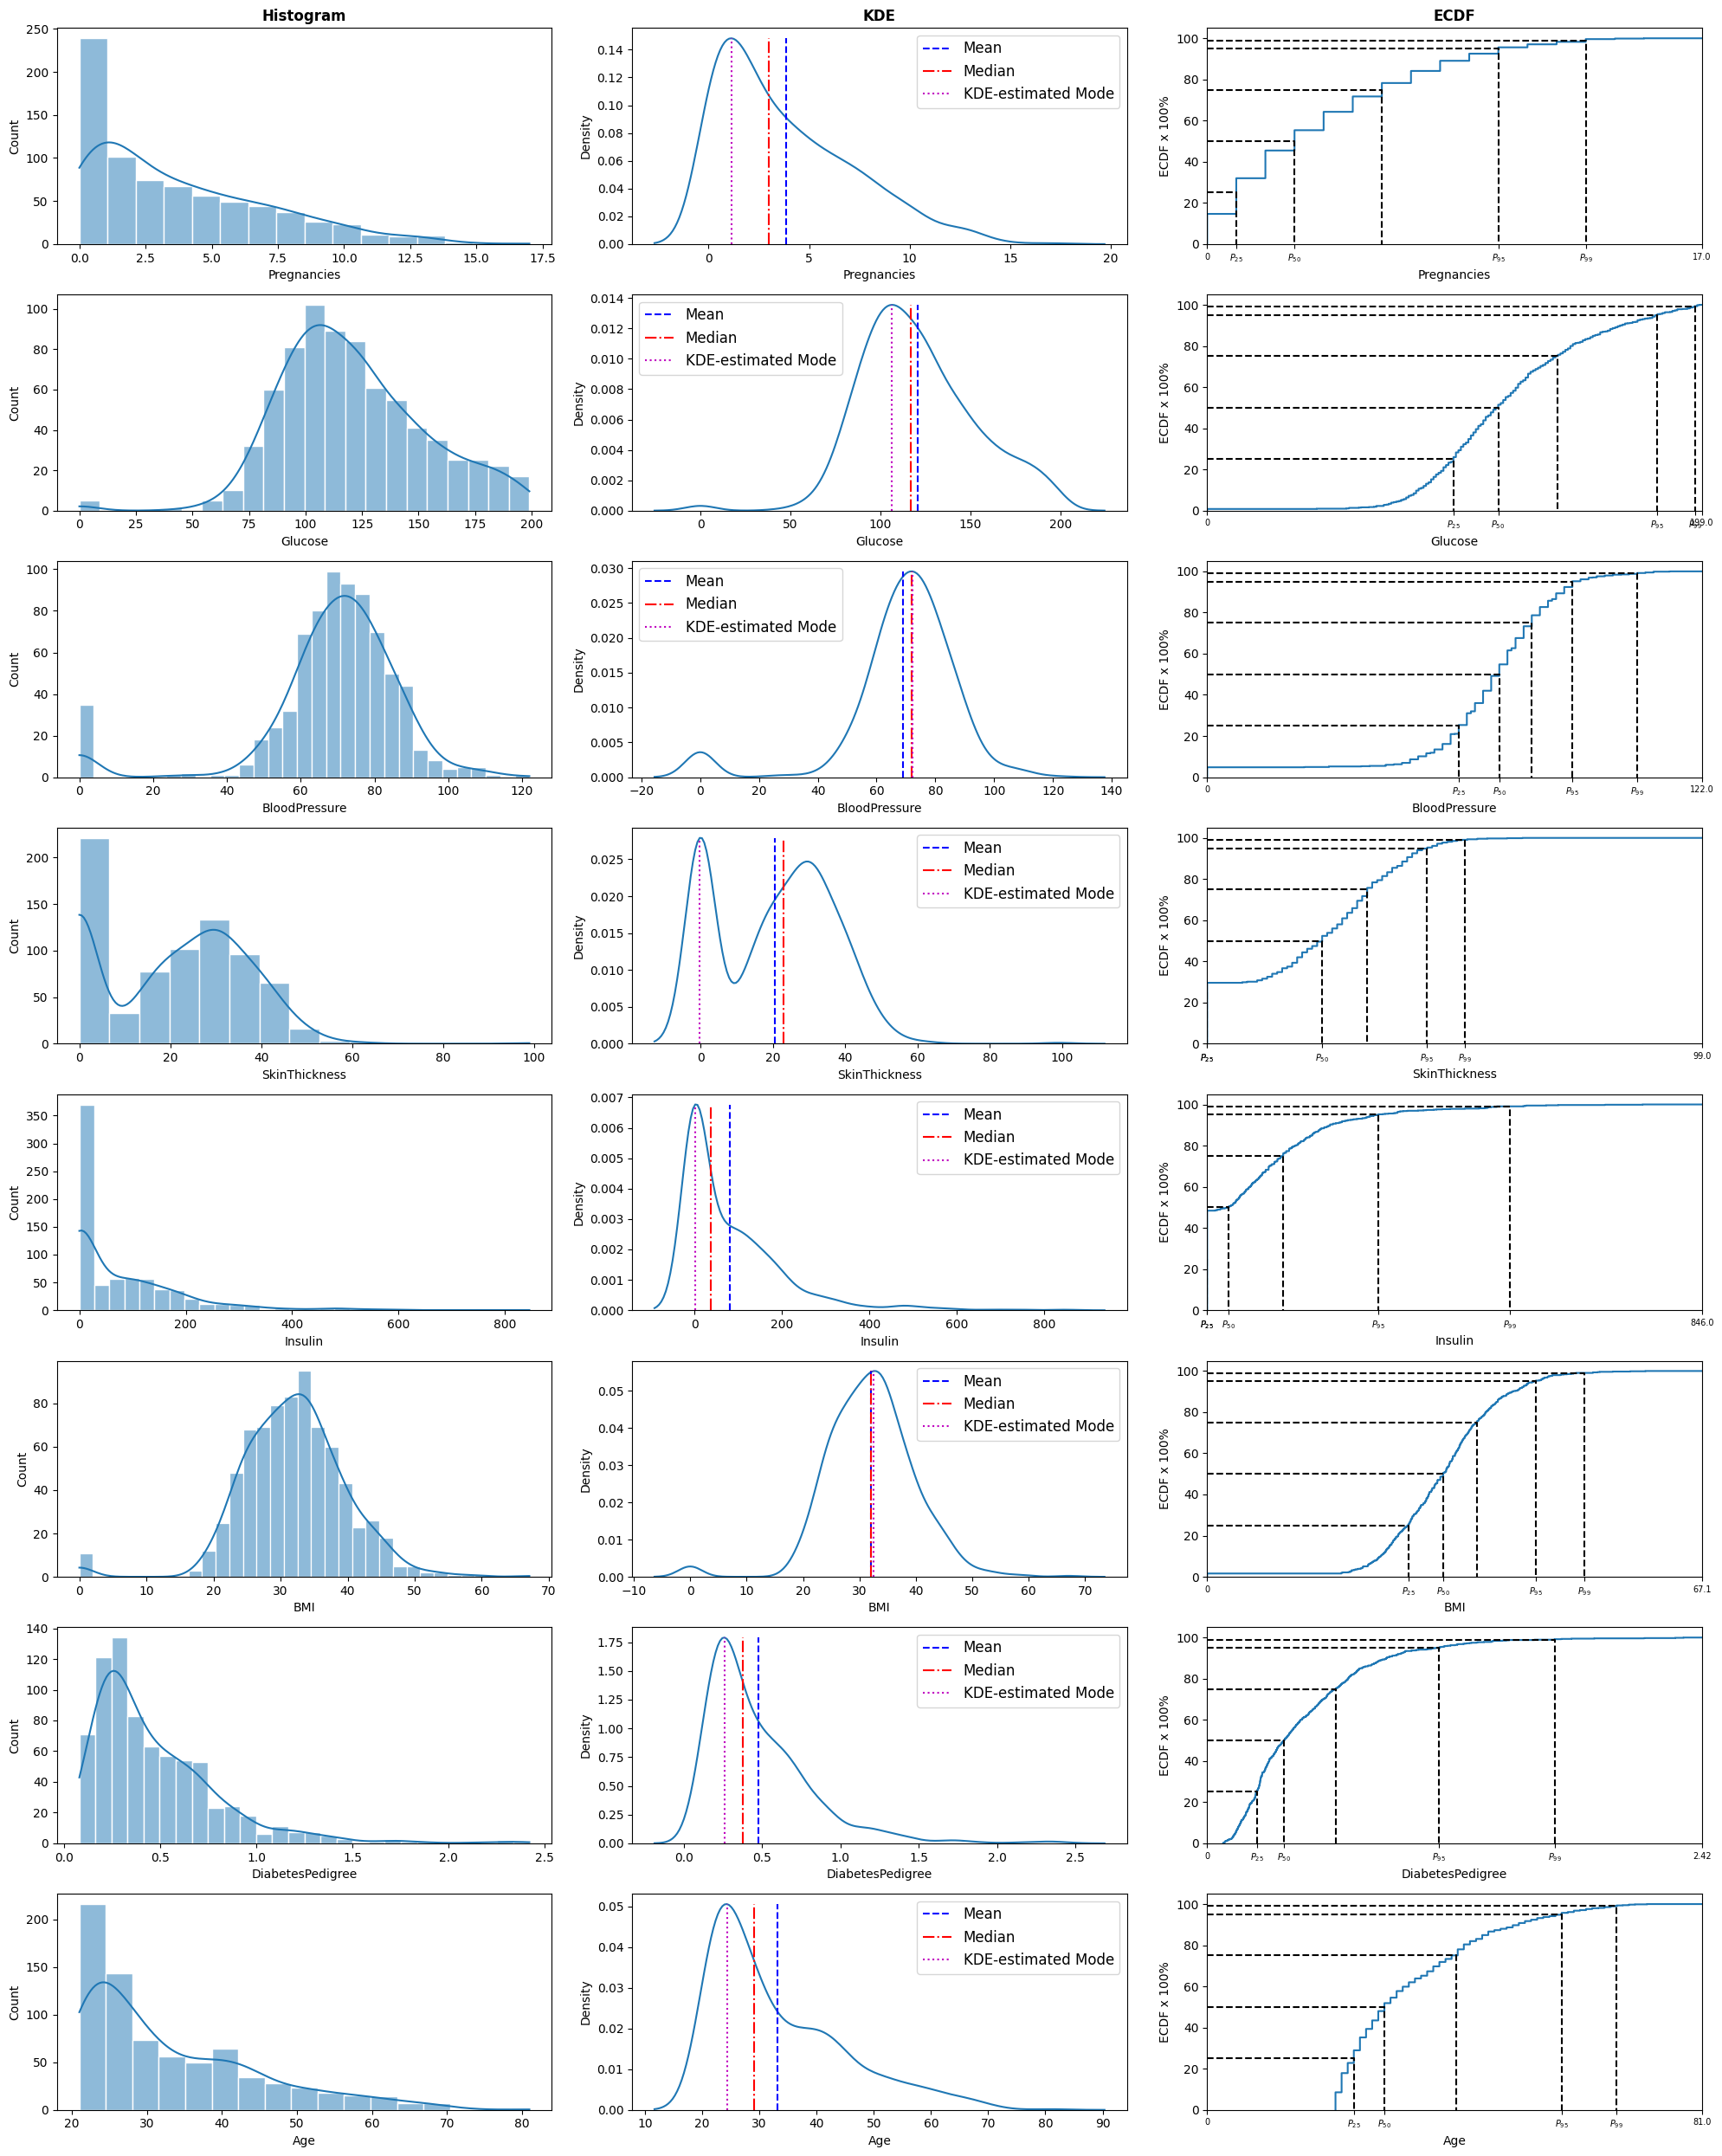

In [ ]:
univariateEDA(pimaNum)

In [ ]:
(pimaNum==0).sum(axis=0) #checking number of zero value

,0
Pregnancies,109
Glucose,5
BloodPressure,35
SkinThickness,221
Insulin,362
BMI,11
DiabetesPedigree,0
Age,0


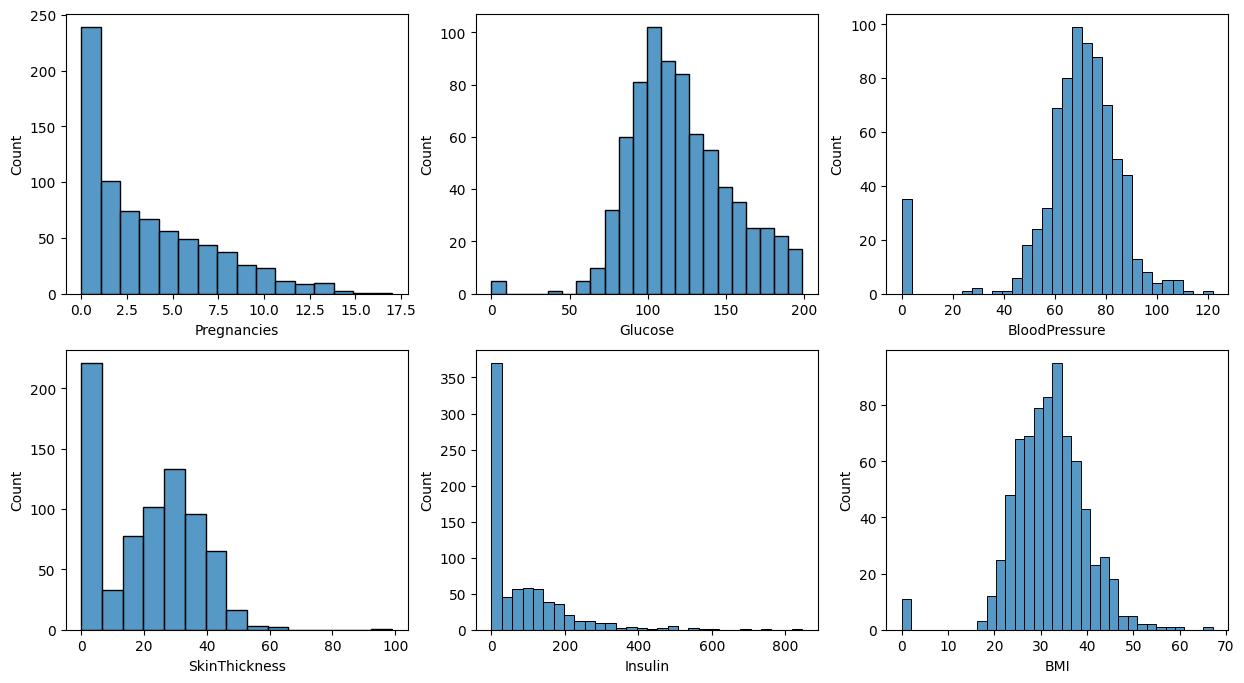

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for i, feature in enumerate(features):
    row = i // 3  #integer division to determine row
    col = i % 3   #modulus to determine column
    sns.histplot(pimaNum[feature], ax=axs[row, col])

plt.show()

In [ ]:
pimaMissing = pimaNum.replace(0, np.nan) #replace zero with NaN

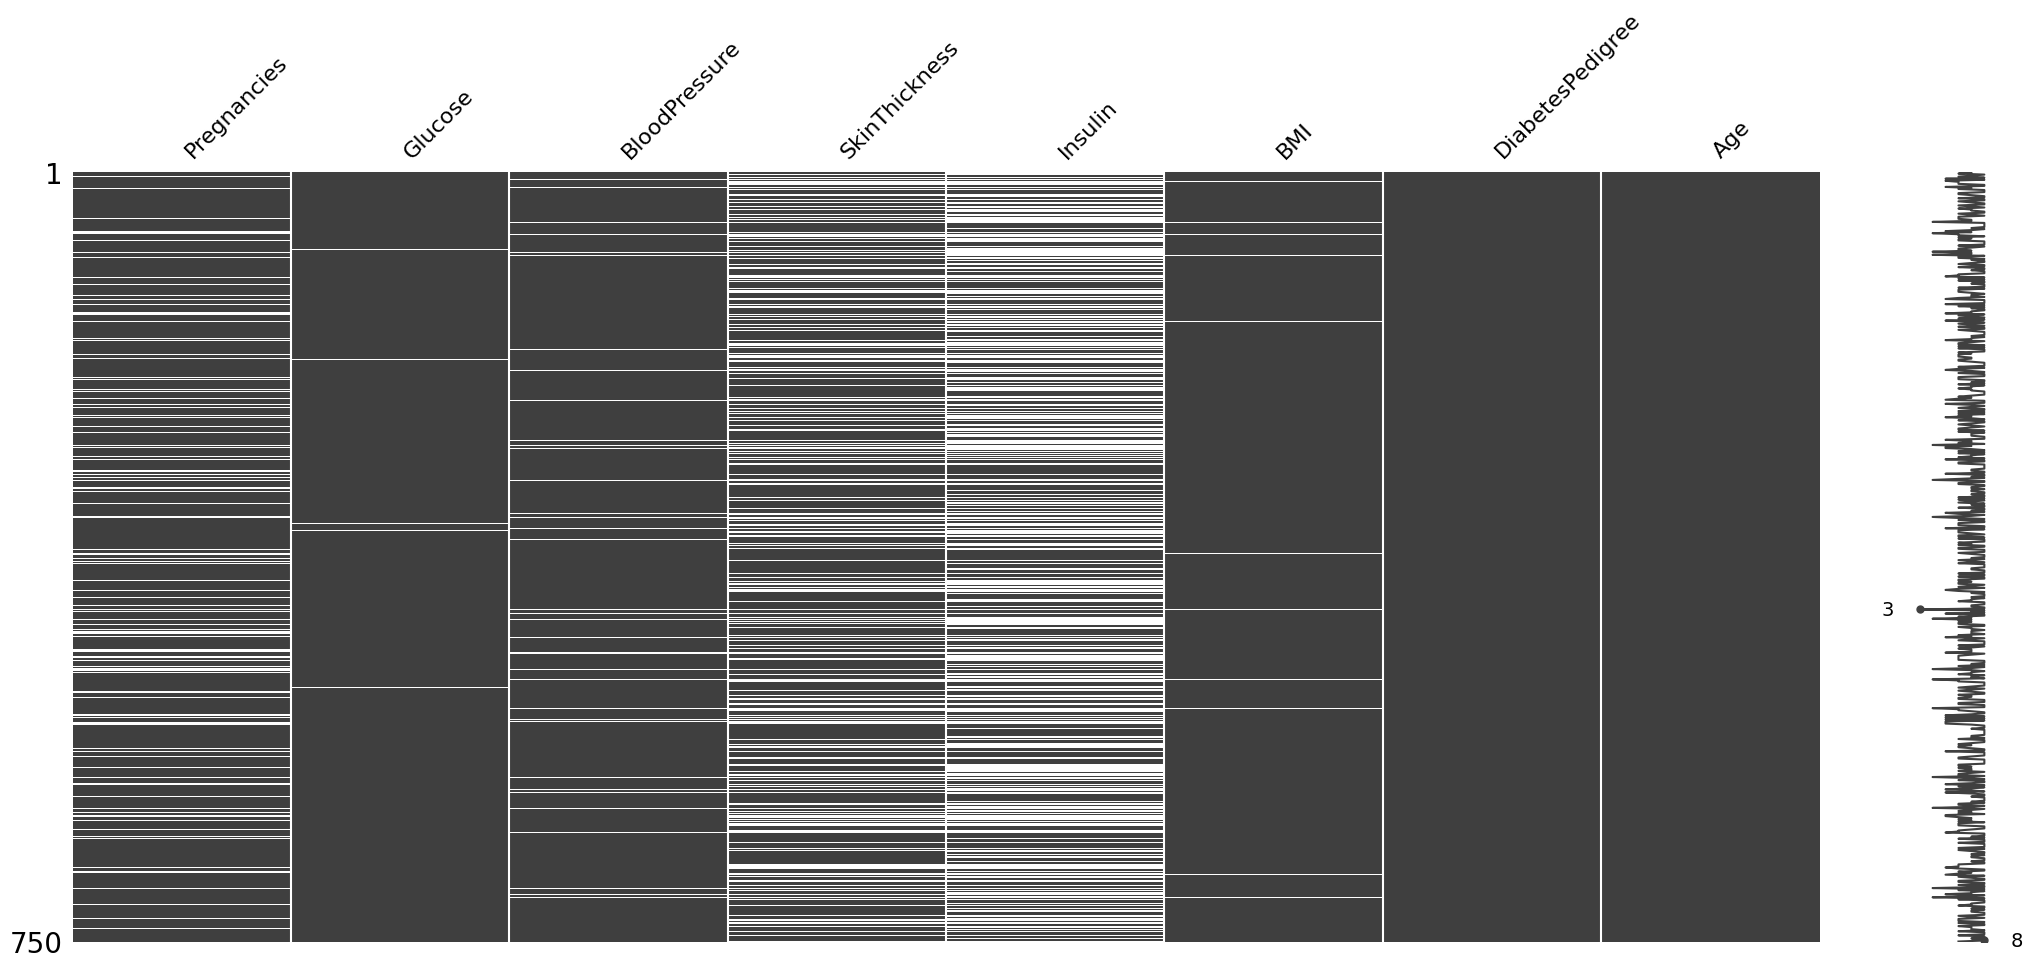

In [ ]:
pimaNumMissing = pimaNum.replace(0,np.nan)

msno.matrix(pimaNumMissing) #visualizing missing values pattern
plt.show()

## **Multivariate**

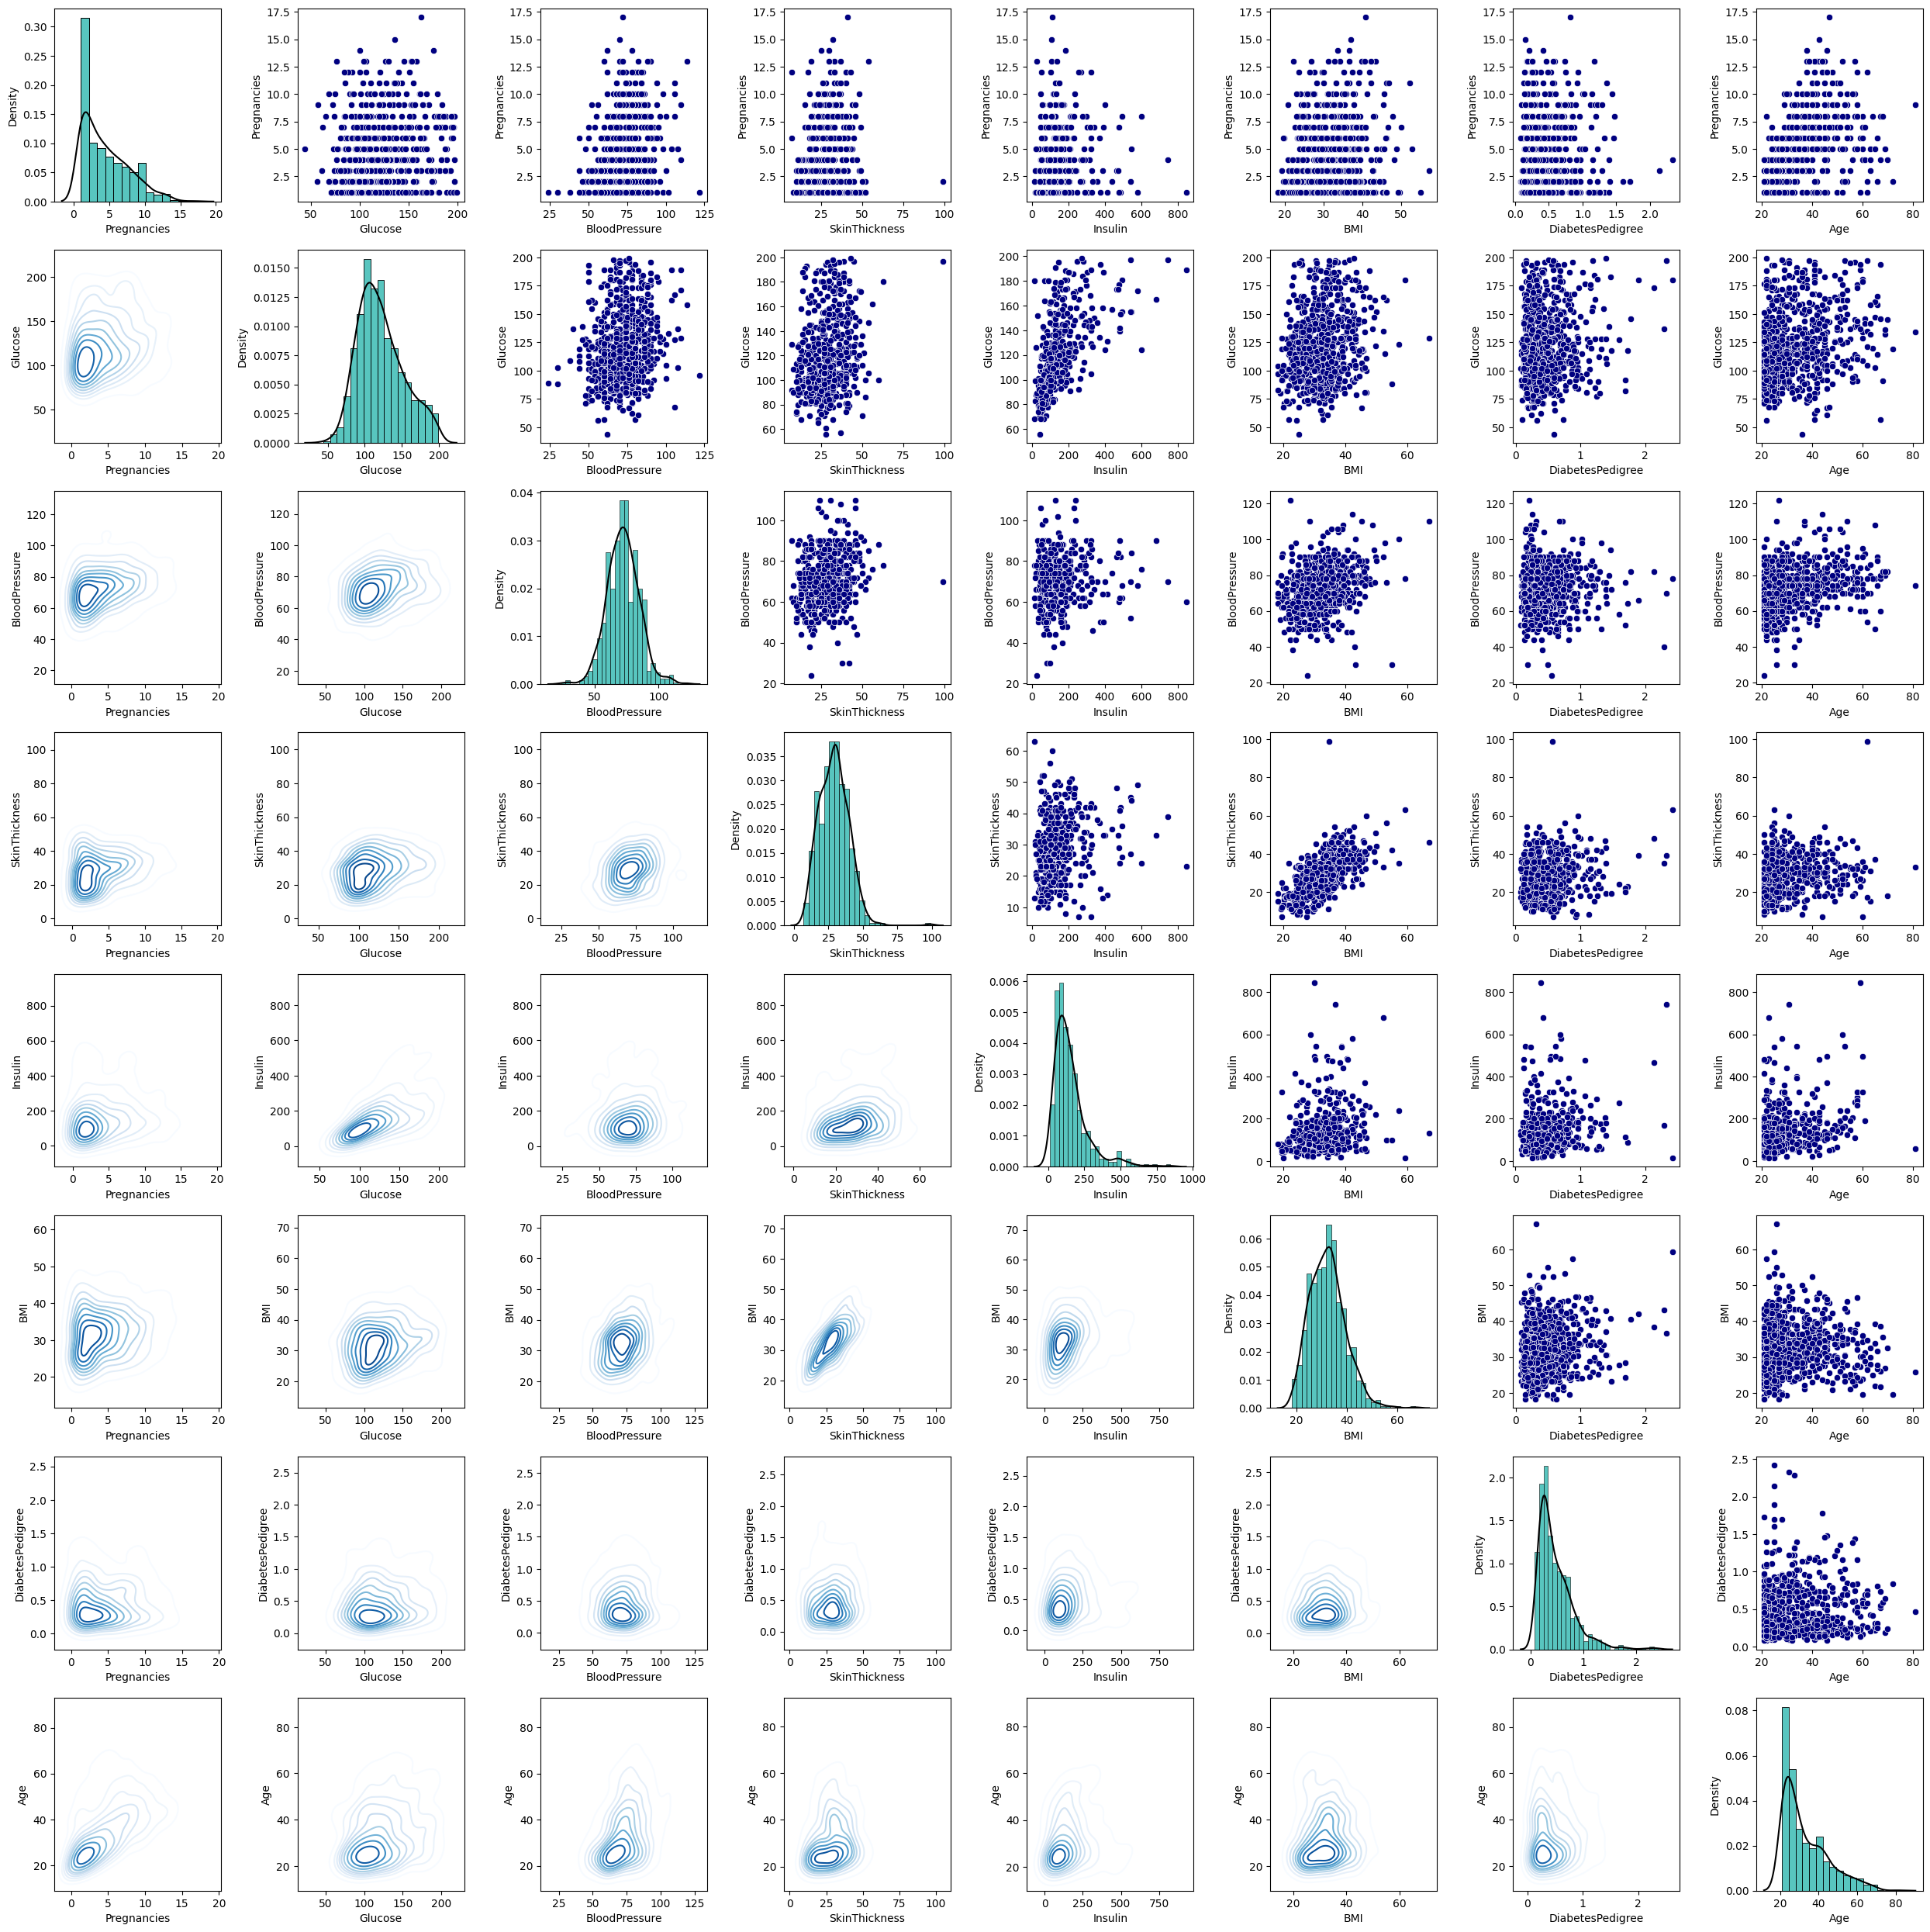

In [ ]:
n_cell = len(pimaNumMissing.columns)
plt.figure(figsize=(25,25))
for i in range(n_cell):
  for j in range(n_cell):
    plt.subplot(n_cell, n_cell, 1+i+(n_cell*j))
    if i == j:
      sns.kdeplot(pimaNumMissing.iloc[:,i], color='black')
      sns.histplot(pimaNumMissing.iloc[:,i], stat='density', color='lightseagreen')
    elif i<j:
      sns.kdeplot(x=pimaNumMissing.iloc[:,i], y=pimaNumMissing.iloc[:,j], cmap='Blues')
    else:
      sns.scatterplot(x=pimaNumMissing.iloc[:,i],y=pimaNumMissing.iloc[:,j], color='navy')

plt.tight_layout()
plt.show()


In [ ]:
pimaNew = pd.concat([pimaNumMissing,pima['Outcome']], axis=1) #concat with the Outcome column

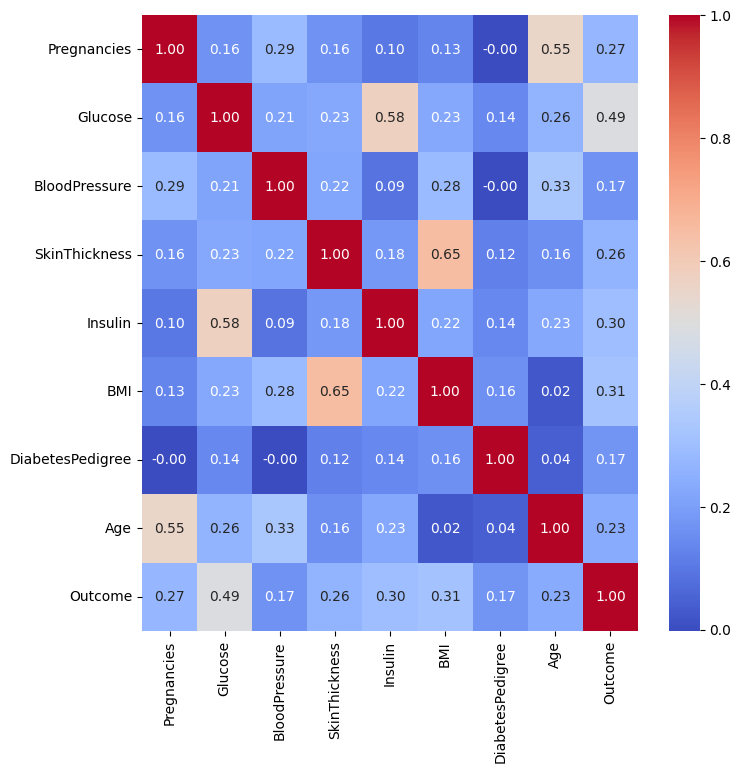

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(pimaNew.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True) #create correlation heatmap
plt.show()

# **3. Adding & Modelling** ***SevenOrMorePregnancies***

In [ ]:
pimaNew["SevenOrMorePregnancies"] = (pimaNew["Pregnancies"]>= 7).astype(int) #create SevenOrMorePregnancies feature

In [ ]:
#applying kNN imputer to Glucose, BloodPressure, BMI
imputer = KNNImputer(n_neighbors=5)
imputedData = imputer.fit_transform(pimaNew[['Glucose', 'BloodPressure', 'BMI']])

imputedPima = pd.DataFrame(imputedData, columns=['Glucose', 'BloodPressure', 'BMI'], index=pimaNew.index)
imputedPima = pd.concat([imputedPima, pimaNew[['Age', 'DiabetesPedigree', 'SevenOrMorePregnancies','Outcome']]], axis=1)

In [ ]:
#modeling single variable (SevenOrMorePregnancies) logistic regression
logitModel = sm.Logit.from_formula('Outcome ~ SevenOrMorePregnancies', data=imputedPima).fit()

print(logitModel.summary2()) #using summary2 to show AIC value

Optimization terminated successfully.
         Current function value: 0.616518
         Iterations 5
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   Outcome            Pseudo R-squared:   0.045     
Date:                 2024-09-23 15:33   AIC:                928.7772  
No. Observations:     750                BIC:                938.0173  
Df Model:             1                  Log-Likelihood:     -462.39   
Df Residuals:         748                LL-Null:            -484.02   
Converged:            1.0000             LLR p-value:        4.7906e-11
No. Iterations:       5.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -0.9199   0.0915 -10.0519 0.0000 -1.0992

In [ ]:
odds6 = math.exp(logitModel.params[0] + logitModel.params[1] * 0)
prob6 = odds6 / (1 + odds6)
print(f'Probability of developing diabetes, given six or fewer pregnancies is {prob6:.2f}')

Probability of developing diabetes, given six or fewer pregnancies is 0.28


<ipython-input-21-e21c70134358>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  odds6 = math.exp(logitModel.params[0] + logitModel.params[1] * 0)


In [ ]:
odds7 = math.exp(logitModel.params[0] + logitModel.params[1] * 1)
prob7 = odds7 / (1 + odds7)
print(f'Probability of developing diabetes, given seven or more pregnancies is {prob7:.2f}')

Probability of developing diabetes, given seven or more pregnancies is 0.57


<ipython-input-22-2570758b9fb0>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  odds7 = math.exp(logitModel.params[0] + logitModel.params[1] * 1)


# **4. Modelling with The Other Features**

In [ ]:
imputedPima.drop(['BloodPressure', 'DiabetesPedigree'], axis=1, inplace=True)

In [ ]:
#create function to run every combination of variable using itertools library

from itertools import combinations

def fit_all_combinations(df, response_var):

  all_vars = list(df.columns)
  all_vars.remove(response_var)

  model_results = {}

  for i in range(1, len(all_vars) + 1):
    for combo in combinations(all_vars, i):
      formula = "{} ~ {}".format(response_var, ' + '.join(combo))
      model = sm.Logit.from_formula(formula, data=df).fit()
      model_results[formula] = model.aic
      print(formula)
      print(model.aic)

  return model_results

In [ ]:
models = fit_all_combinations(imputedPima, "Outcome")

Optimization terminated successfully.
         Current function value: 0.519730
         Iterations 6
Outcome ~ Glucose
783.595021508361
Optimization terminated successfully.
         Current function value: 0.596311
         Iterations 5
Outcome ~ BMI
898.4662100559788
Optimization terminated successfully.
         Current function value: 0.618811
         Iterations 5
Outcome ~ Age
932.2166639904597
Optimization terminated successfully.
         Current function value: 0.616518
         Iterations 5
Outcome ~ SevenOrMorePregnancies
928.7771692022759
Optimization terminated successfully.
         Current function value: 0.492452
         Iterations 6
Outcome ~ Glucose + BMI
744.678127503887
Optimization terminated successfully.
         Current function value: 0.513107
         Iterations 6
Outcome ~ Glucose + Age
775.6600730538138
Optimization terminated successfully.
         Current function value: 0.501575
         Iterations 6
Outcome ~ Glucose + SevenOrMorePregnancies
758.362272

In [ ]:
chosenModel = sm.Logit.from_formula('Outcome ~ Glucose + BMI + SevenOrMorePregnancies', data = imputedPima).fit()
print(chosenModel.summary2())

Optimization terminated successfully.
         Current function value: 0.473849
         Iterations 6
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   Outcome            Pseudo R-squared:   0.266     
Date:                 2024-09-23 15:33   AIC:                718.7730  
No. Observations:     750                BIC:                737.2533  
Df Model:             3                  Log-Likelihood:     -355.39   
Df Residuals:         746                LL-Null:            -484.02   
Converged:            1.0000             LLR p-value:        1.7555e-55
No. Iterations:       6.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -8.4166   0.6712 -12.5399 0.0000 -9.7321

In [ ]:
toPredict = pd.read_csv('ToPredict.csv') #read toPredict.csv
toPredict['SevenOrMorePregnancies'] = (toPredict['Pregnancies']>=7).astype(int) #add SevenOrMorePregnancies column

In [ ]:
#predicting diabetes from toPredict observations
probPrediction = chosenModel.predict(toPredict)

threshold = 0.5 #default threshold
toPredict['DiabetesPrediction'] = (probPrediction>=threshold).astype(int)
toPredict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,SevenOrMorePregnancies,DiabetesPrediction
0,4,136,70,0,0,31.2,1.182,22,0,0
1,1,121,78,39,74,39.0,0.261,28,0,0
2,3,108,62,24,0,26.0,0.223,25,0,0
3,0,181,88,44,510,43.3,0.222,26,0,1
4,8,154,78,32,0,32.4,0.443,45,1,1


In [ ]:
#checking contribution of Glucose to probability
test = toPredict.iloc[0:1].copy() #using 1st row of toPredict
test.loc[1, :] = test.loc[0,:] #copy 1st row to 2nd row
test.loc[1, 'Glucose'] = 137 #replacing value to 1

probPrediction1 = chosenModel.predict(test.iloc[0])
probPrediction2 = chosenModel.predict(test.iloc[1])

print(f'Adding 1 unit of Glucose will increase probability by {probPrediction2[1] - probPrediction1[0]:.4f}')

Adding 1 unit of Glucose will increase probability by 0.0082


In [ ]:
#checking contribution of BMI to probability
test = toPredict.iloc[0:1].copy() #using 1st row of toPredict
test.loc[1, :] = test.loc[0,:] #copy 1st row to 2nd row
test.loc[1, 'BMI'] = 32.2 #replacing value to 1

probPrediction1 = chosenModel.predict(test.iloc[0])
probPrediction2 = chosenModel.predict(test.iloc[1])

print(f'Adding 1 unit of BMI will increase probability by {probPrediction2[1] - probPrediction1[0]:.4f}')

Adding 1 unit of BMI will increase probability by 0.0201


In [ ]:
#checking contribution of SevenOrMorePregnancies to probability
test = toPredict.iloc[0:1].copy() #using 1st row of toPredict
test.loc[1, :] = test.loc[0,:] #copy 1st row to 2nd row
test.loc[1, 'SevenOrMorePregnancies'] = 1 #replacing value to 1

probPrediction1 = chosenModel.predict(test.iloc[0])
probPrediction2 = chosenModel.predict(test.iloc[1])

print(f'Having seven or more pregnancies will increase probability by {probPrediction2[1] - probPrediction1[0]:.4f}')

Having seven or more pregnancies will increase probability by 0.2730
